## CA 1, LLMs Spring 2024

- **Name:Bardia Khalafi**
- **Student ID:810199414**

---
### This is due on **April 2nd, 2024**, submitted via [elearn](https://elearn.ut.ac.ir/).
#### Your submission should be named using the following format: `CA1_LASTNAME_STUDENTID.ipynb`.

### **IMPORTANT**: After copying this notebook to your Google Drive, please paste a link to it below. To get a publicly-accessible link, hit the *Share* button at the top right, then click "Get shareable link" and copy over the result. If you fail to do this, you will receive no credit for this homework!
# ***LINK: *https://colab.research.google.com/drive/1am4rviwJIxt90FUb8wul11f9LHSfkPXZ?usp=sharing****

---

##### *How to do this problem set:*

- Some questions require writing Python code and computing results, and the rest of them have written answers. For coding problems, you will have to fill out all code blocks that say `YOUR CODE HERE`.

- For text-based answers, you should replace the text that says "Write your answer here..." with your actual answer.

- There is no penalty for using AI assistance on this homework as long as you fully disclose it in the final cell of this notebook (this includes storing any prompts that you feed to large language models). That said, anyone caught using AI assistance without proper disclosure will receive a zero on the assignment (we have several automatic tools to detect such cases). We're literally allowing you to use it with no limitations, so there is no reason to lie!

---

##### *Academic honesty*

- We will audit the Colab notebooks from a set number of students, chosen at random. The audits will check that the code you wrote actually generates the answers in your notebook. If you turn in correct answers on your notebook without code that actually generates those answers, we will consider this a serious case of cheating.

- We will also run automatic checks of Colab notebooks for plagiarism. Copying code from others is also considered a serious case of cheating.

---

If you have any further questions or concerns, contact the TA via email:
namazifard@ut.ac.ir

---

# Part 1: Word Embeddings and Masked LMs (40 points)

### Question 1.1 (5 points)

In this part, we will start with `GloVe` [(Pennington et al.)](https://aclanthology.org/D14-1162.pdf) word embeddings. `GloVe` provides low-dimensional dense vectors representing words' semantics. The distance between `GloVe` embeddings captures the semantic relationships of words. We are using the `Gensim` library for  working with `GloVe` embeddings. Let's install `Gensim` and download the 6B token model. Also, we should unzip the model file. Running the cell below could take a few minutes.

In [3]:
!pip install gensim
!wget https://nlp.stanford.edu/data/glove.6B.zip
!unzip "/content/glove.6B.zip"

--2024-03-19 10:25:21--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-03-19 10:25:21--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.04MB/s    in 2m 42s  

2024-03-19 10:28:04 (5.07 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  /content/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
 

We are using the model file with 6 billion tokens containing 200-dimensional vectors. Running the cell below will create the word embedding model.

In [4]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

glove_input_file = 'glove.6B.200d.txt'
model = KeyedVectors.load_word2vec_format(glove_input_file, binary=False, no_header=True)

Try to write the 5 most similar words to **computer**, **football**, **ocean**, **music**, and **artificial** along with their similarity scores.

In [5]:
def get_similar_words(word, topn):
    similar_words = model.most_similar(word, topn=topn)
    return similar_words
word_list = ['computer', 'football', 'ocean', 'music', 'artificial']

for word in word_list:
    print(get_similar_words(word, 3))


[('computers', 0.8357723951339722), ('software', 0.7828460335731506), ('technology', 0.6907660961151123)]
[('soccer', 0.8105178475379944), ('basketball', 0.7896140813827515), ('league', 0.716710090637207)]
[('sea', 0.7277445197105408), ('waters', 0.724154531955719), ('coast', 0.6972916126251221)]
[('musical', 0.7338810563087463), ('songs', 0.7253574728965759), ('pop', 0.6906009912490845)]
[('natural', 0.5050912499427795), ('insemination', 0.4972018897533417), ('man-made', 0.4853343069553375)]


**Analogy** in word embeddings refers to performing algebraic operations on vectors to capture the most similar words to the resulting embedding. One of the most famous examples is the analogy *king - man + woman = queen*. In `Gensim`, we can apply analogies using the `most_similar` function. The `positive` argument receives a list of words and applies addition between their embeddings, while the `negative` argument receives a list of words to subtract their embeddings from the result. In our example, *king* and *woman* are in the positive list, while *man* is in the negative list.

Let's explore more analogies and the power of `GloVe` embeddings. Write down five other analogies.

In [6]:
def get_similar_words_analogy(positive_list, negative_list, topn):

    result = model.most_similar(
        positive=positive_list,
        negative=negative_list,
        topn=topn
        )
    return result

positive_lists = [
    ['paris', 'italy'],
    ['banana', 'car'],
    ['football', 'music'],
    ['doctor', 'woman'],
    ['german', 'japan']
]

negative_lists = [
    ['france'],
    ['fruit'],
    ['sport'],
    ['man'],
    ['germany']
]

for index in range(5):
    print(get_similar_words_analogy(
        positive_list=positive_lists[index],
        negative_list=negative_lists[index],
        topn=1
    ))

[('rome', 0.7585406303405762)]
[('driver', 0.5611459612846375)]
[('songs', 0.5580971837043762)]
[('nurse', 0.6813318729400635)]
[('japanese', 0.9356759190559387)]


### Question 1.2 (10 points)
Let's visualize embeddings! We'll start with the following list of words. Extract the embedding for each word and reduce their dimensionality to 2 using the `t-SNE` [(Van der Maaten et al.)](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf) algorithm. Then, plot them on a scatter plot with their labels.

#### Using T-SNE

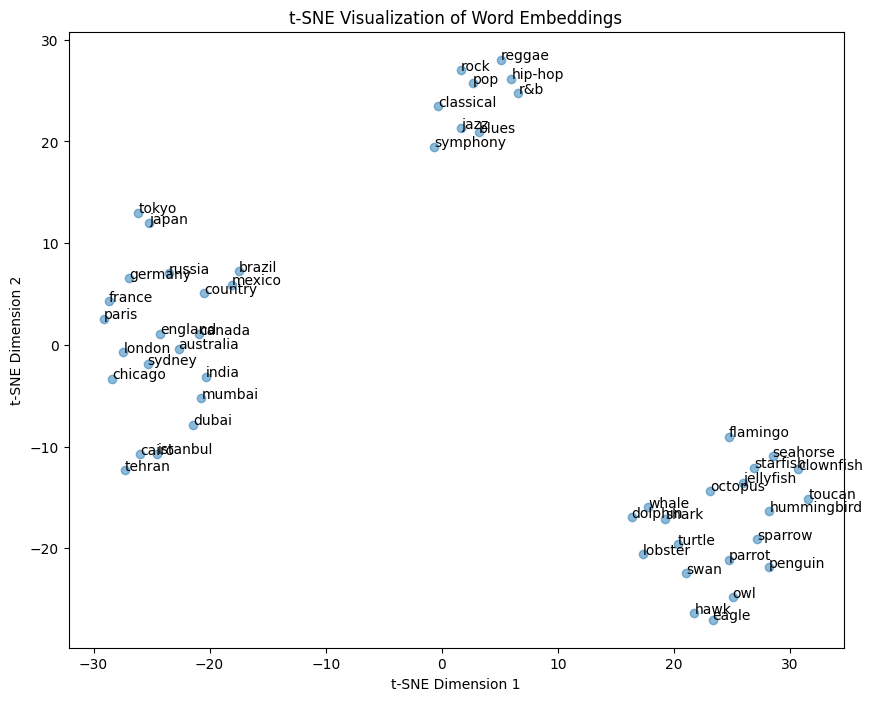

In [7]:
words = [
    "dolphin", "shark", "octopus", "jellyfish", "seahorse",
    "turtle", "clownfish", "lobster", "starfish", "whale",
    "eagle", "sparrow", "owl", "hummingbird", "penguin",
    "toucan", "flamingo", "hawk", "parrot", "swan",
    "england", "brazil", "japan", "australia", "india",
    "germany", "canada", "france", "mexico", "russia",
    "chicago", "paris", "tokyo", "london", "sydney",
    "istanbul", "tehran", "cairo", "dubai", "mumbai",
    "symphony", "jazz", "rock", "blues", "reggae",
    "hip-hop", "country", "pop", "classical", "r&b"
]


import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def dimensionality_reduction(vectors):
    tsne = TSNE(n_components=2, perplexity=5, random_state=42)
    vectors_2d = tsne.fit_transform(vectors)

    return vectors_2d

def plot_with_labels(vectors_2d, title):
    plt.figure(figsize=(10, 8))
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], alpha=0.5)

    # Add labels to each point
    for i in range(len(words)):
        plt.annotate(words[i], (vectors_2d[i, 0], vectors_2d[i, 1]))

    plt.xlabel(f'{title} Dimension 1')
    plt.ylabel(f'{title} Dimension 2')
    plt.title(f'{title} Visualization of Word Embeddings')
    plt.show()

## Use 5 for perplexity of TSNE
vectors = model[words]
vectors_2d = dimensionality_reduction(vectors)
plot_with_labels(vectors_2d, 't-SNE')





#### Using PCA

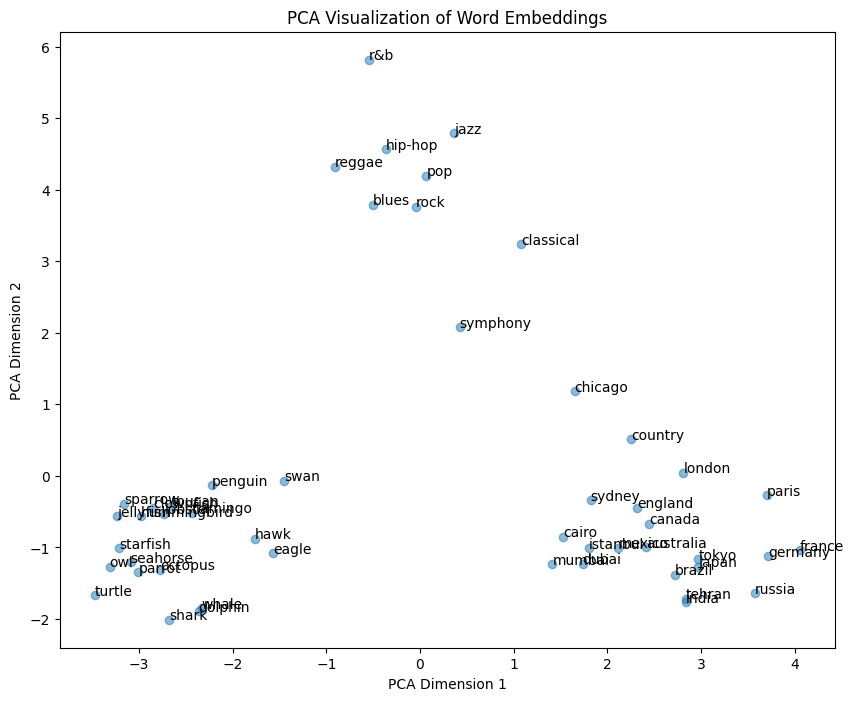

In [8]:
from sklearn.decomposition import PCA

def pca_reduction(vectors):
    pca = PCA(n_components=2, random_state=42)
    vectors_2d = pca.fit_transform(vectors)
    return vectors_2d

vectors = model[words]
vectors_2d = pca_reduction(vectors)
plot_with_labels(vectors_2d, 'PCA')

Analyze the plot and clusters of embeddings in a few sentences.

Each cluster has a similar meaning to it, one cluster represents the **cities and countries** ( we can see the japan and tokyo near together too )
another cluster contains **animals**
and the last one represents **musics genres**

and for the dimentionality reduction method, **t-SNE** creates more compact and separable clusters due to its **non-linearity** nature

### Question 1.3 (15 points)
Find the most similar words to **bat** and **charge** in GloVe.

In [9]:
print(get_similar_words('bat', 3))
print(get_similar_words('charge', 3))

[('bats', 0.691724419593811), ('batting', 0.6160588264465332), ('balls', 0.5692734122276306)]
[('charges', 0.8177176117897034), ('charged', 0.8067139983177185), ('charging', 0.6606977581977844)]


Now, consider these sentences:
* *The **bat** flew swiftly through the air.*
* *He grabbed his **bat** and headed to the baseball field.*

Or these sentences:
* *I need to **charge** my phone before leaving.*
* *He was arrested for **charge** of theft.*

As you can see, a static vector cannot capture the meaning of a word in every context, and some words have very different meanings in different sentences. In this part, we will work with a masked language model, which captures contextual embeddings. Let's import necessary modules and load the `BERT` [(Devlin et al.)](https://aclanthology.org/N19-1423.pdf) model.

In [10]:
import torch
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained("bert-base-uncased", output_hidden_states=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

The cell below demonstrates how to input data into the `BERT` model and how to capture word embeddings from each layer.

In [11]:
test_input = "This is a test"
test_encodings = tokenizer(test_input, return_tensors='pt')
output = model(**test_encodings)
print("Num. of BERT layers:", len(output[-1]))
print("Dimensionality of each layer output (batch_size * num_tokens * embedding_dim): ", output[-1][0].size())

Num. of BERT layers: 13
Dimensionality of each layer output (batch_size * num_tokens * embedding_dim):  torch.Size([1, 6, 768])


In this part, you should analyze the embeddings of the word **bat** in the output of each layer of the `BERT` model for the provided sentences. First, identify the location of the **bat** embedding within the output of each layer for both sentences. Next, calculate the `cosine similarity` between the **bat** embeddings for each layer. Finally, examine the similarity levels of the **bat** embeddings between the two sentences across the various layers of the `BERT` model.

In [12]:
sentence1 = 'The bat flew swiftly through the air.' # bat position -> 3
sentence2 = 'He grabbed his bat and headed to the baseball field.'# bat position -> 5

sentence1_encodings = tokenizer(sentence1, return_tensors='pt')
sentence2_encodings = tokenizer(sentence2, return_tensors='pt')
bat_encodings = tokenizer('bat', return_tensors='pt')

print(sentence1_encodings)
print(sentence2_encodings)
print(bat_encodings) #bat -> 7151

{'input_ids': tensor([[  101,  1996,  7151,  5520, 12128,  2083,  1996,  2250,  1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}
{'input_ids': tensor([[ 101, 2002, 4046, 2010, 7151, 1998, 3753, 2000, 1996, 3598, 2492, 1012,
          102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}
{'input_ids': tensor([[ 101, 7151,  102]]), 'token_type_ids': tensor([[0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1]])}


<ipython-input-13-0ffa0723ea1d>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  layer_similarities[i][j] = cosine_similarity(layer_embeddings1[i], layer_embeddings2[j])


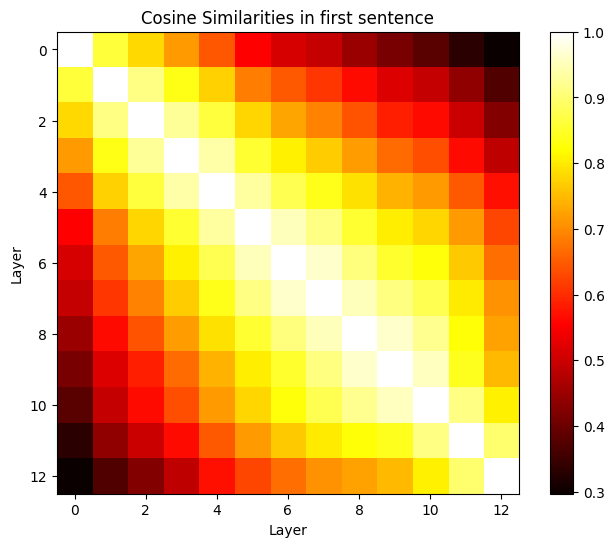

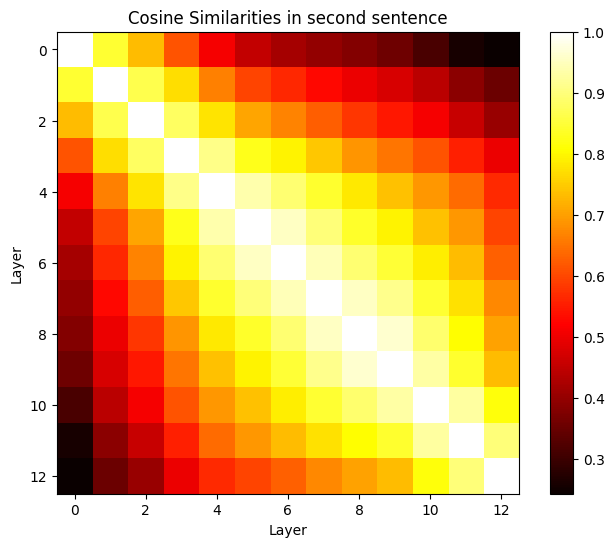

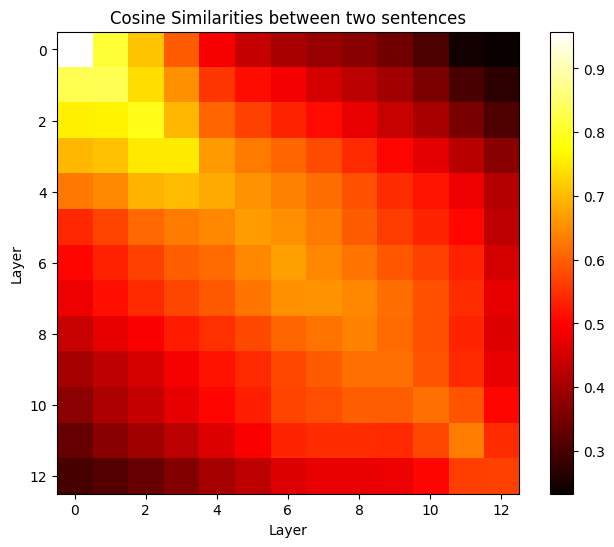

In [13]:
output1 = model(**sentence1_encodings)
output2 = model(**sentence2_encodings)

def get_embeddings_for_layers(layer_outputs, word_pos):
    bat_layer_embeddings = []
    for layer_index in range(len(layer_outputs[-1])):
        bat_layer_embedding = layer_outputs[-1][layer_index][:, word_pos, :]
        bat_layer_embeddings.append(bat_layer_embedding.detach().numpy())
    return bat_layer_embeddings

def cosine_similarity(vec1, vec2):

    dot_product = np.dot(vec1, vec2.T)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    similarity = dot_product / (norm_vec1 * norm_vec2)
    return similarity

def plot_similarity_matrix(layer_embeddings1, layer_embeddings2, title):

    layer_similarities = np.zeros((len(output[-1]), len(output[-1])))

    for i in range(len(output[-1])):
        for j in range(len(output[-1])):
            layer_similarities[i][j] = cosine_similarity(layer_embeddings1[i], layer_embeddings2[j])

    plt.figure(figsize=(8, 6))
    plt.imshow(layer_similarities, cmap='hot')
    plt.colorbar()
    plt.title(f'Cosine Similarities {title}')
    plt.xlabel('Layer')
    plt.ylabel('Layer')
    plt.show()

bat_layer_embeddings1 = get_embeddings_for_layers(output1, 2)
bat_layer_embeddings2 = get_embeddings_for_layers(output2, 4)
plot_similarity_matrix(bat_layer_embeddings1, bat_layer_embeddings1, 'in first sentence')
plot_similarity_matrix(bat_layer_embeddings2, bat_layer_embeddings2, 'in second sentence')
plot_similarity_matrix(bat_layer_embeddings1, bat_layer_embeddings2, 'between two sentences')


Do the same for **charge** provided sentences.

In [14]:
sentence1 = 'I need to charge my phone before leaving.' # charge position -> 5
sentence2 = 'He was arrested for charge of theft.'# charge position -> 6

sentence1_encodings = tokenizer(sentence1, return_tensors='pt')
sentence2_encodings = tokenizer(sentence2, return_tensors='pt')
charge_encodings = tokenizer('charge', return_tensors='pt')

print(sentence1_encodings)
print(sentence2_encodings)
print(charge_encodings) #charge -> 3715

{'input_ids': tensor([[ 101, 1045, 2342, 2000, 3715, 2026, 3042, 2077, 2975, 1012,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}
{'input_ids': tensor([[  101,  2002,  2001,  4727,  2005,  3715,  1997, 11933,  1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}
{'input_ids': tensor([[ 101, 3715,  102]]), 'token_type_ids': tensor([[0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1]])}


<ipython-input-13-0ffa0723ea1d>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  layer_similarities[i][j] = cosine_similarity(layer_embeddings1[i], layer_embeddings2[j])


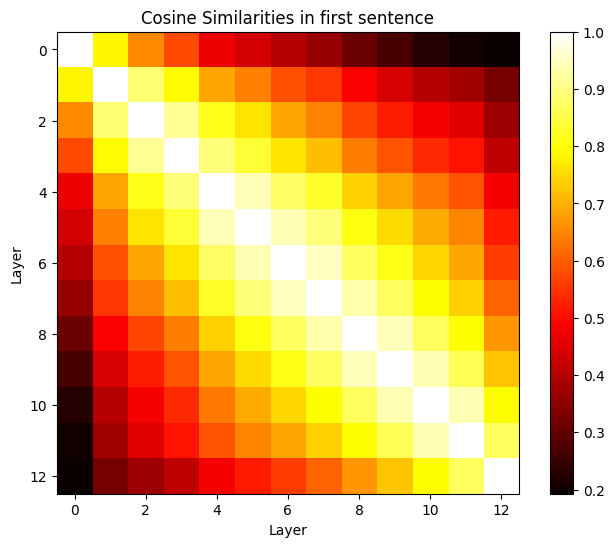

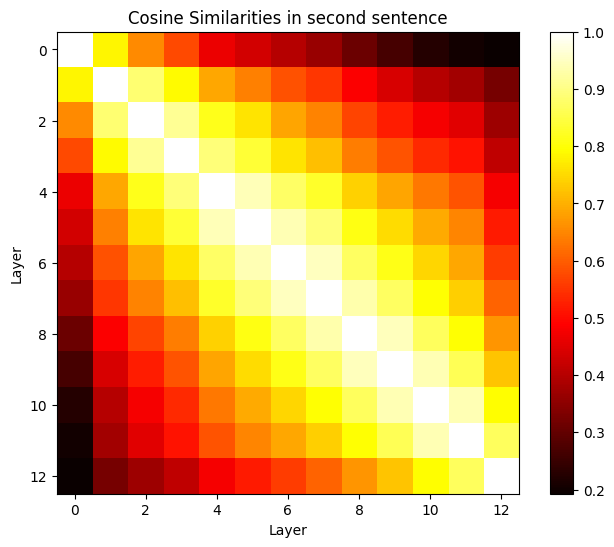

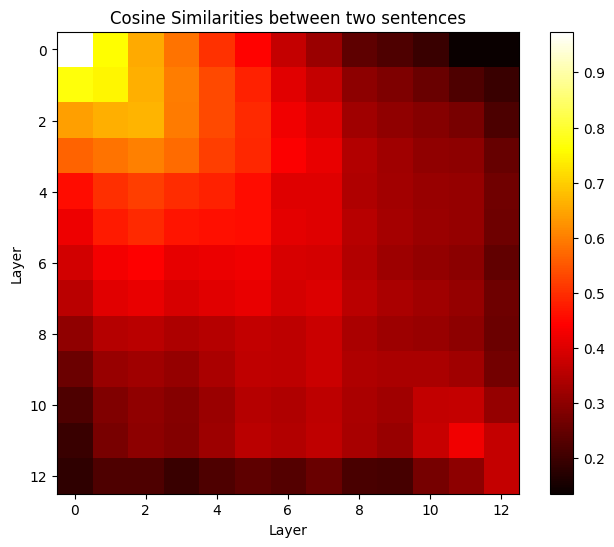

In [15]:
output1 = model(**sentence1_encodings)
output2 = model(**sentence2_encodings)

charge_layer_embeddings1 = get_embeddings_for_layers(output1, 4)
charge_layer_embeddings2 = get_embeddings_for_layers(output2, 5)
plot_similarity_matrix(charge_layer_embeddings1, charge_layer_embeddings1, 'in first sentence')
plot_similarity_matrix(charge_layer_embeddings1, charge_layer_embeddings1, 'in second sentence')
plot_similarity_matrix(charge_layer_embeddings1, charge_layer_embeddings2, 'between two sentences')

Write a few sentences about your results and how `BERT` captures the contextual meaning of words.



in each layer, the representation of word is changing and getting closer to the meaning of the word in that context
as we can see, **in a single sentence** : in the first layers, the embeddings are
similar and as we go to the next layers, the similarity drops

and **for two sentences**, first layer embeddings are quite similar because they came from a **static embedding**, after some layers they are not similar anymore and each one represents the meaning of the words in their context

**in conclusion**: BERT captures contextual meaning of words with attentions in its each layer, and after each layer, the representations of words are getting better.

### Question 1.4 (10 points)
In this part, we will use `BERT` for masked word completion task. Run the following cell to download the pretrained BERT base model (cased).

In [16]:
from transformers import AutoTokenizer, AutoModelForMaskedLM
import torch
import torch.nn.functional as F

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModelForMaskedLM.from_pretrained("bert-base-uncased")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Let's challenge `BERT`'s knowledge about named entities. Consider the following sentences
- **William Shakespeare**, widely regarded as the greatest writer in the English language, was born in Stratford-upon-Avon, England, in 1564.
- The Amazon Rainforest, spanning across nine countries in **South America**,
is the largest tropical rainforest on Earth, covering an area of over 6.7
million square kilometers (2.7 million square miles) and harboring
unparalleled biodiversity.
- The Statue of Liberty, a gift from **France** to the United States, was dedicated
on October 28, 1886. Standing on Liberty Island in New York Harbor, it
symbolizes freedom and democracy and has become a universal symbol of hope and
opportunity.

Replace the bold words with the mask token (if they are more than one token, put as many as needed). Write down the top 5 choices of BERT for the mask tokens. In this part, you should use `token_logits`.

*Hints*

- Use `torch.where` to find the index of a masked token within the input tensor (note that `tokenizer.mask_token_id` gives us the index of the mask token in the vocabulary).
- Use `torch.topk` to get the k largest elements of a given tensor along a given dimension.
- Use `tokenizer.decode([token_id])` to convert a single integer `token_id` to a token string.

In [17]:

sentence1 = '[MASK] [MASK], widely regarded as the greatest writer in the English language, was born in Stratford-upon-Avon, England, in 1564.'
sentence2 = 'The Amazon Rainforest, spanning across nine countries in [MASK] [MASK], is the largest tropical rainforest on Earth, \
covering an area of over 6.7 million square kilometers (2.7 million square miles) and harboring unparalleled biodiversity.'
sentence3 = 'The Statue of Liberty, a gift from [MASK] to the United States, was dedicated on October 28, 1886. \
Standing on Liberty Island in New York Harbor, it symbolizes freedom and democracy and has become a universal symbol of hope and opportunity.'

def print_top_predictions(topk_predictions, k):
    print("Top-{} predicted tokens and their probabilities:".format(k))
    for token, prob in topk_predictions:
        print("{}: {:.4f}".format(token, prob), end=' ')
    print('\n')

def predict_masks(sentence, k, sentence_num):
    print(f'Predicted masks for sentence {sentence_num}\n')
    tokenized_text = tokenizer.tokenize(sentence)
    masked_indices = [i for i, token in enumerate(tokenized_text) if token == '[MASK]']
    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
    tokens_tensor = torch.tensor([indexed_tokens])

    with torch.no_grad():
        predictions = model(tokens_tensor)

    for masked_index in masked_indices:
        logits = predictions[0][0][masked_index]
        probabilities = F.softmax(logits, dim=0)
        topk_predicted_probabilities, topk_predicted_indices = torch.topk(probabilities, k)

        # Convert indices to tokens
        topk_predicted_tokens = tokenizer.convert_ids_to_tokens(topk_predicted_indices.tolist())

        # Zip tokens with probabilities
        topk_predictions = list(zip(topk_predicted_tokens, topk_predicted_probabilities.tolist()))
        print_top_predictions(topk_predictions, k)
    print('\n')

K = 5

predict_masks(sentence1, K, 1)
predict_masks(sentence2, K, 2)
predict_masks(sentence3, K, 3)


Predicted masks for sentence 1

Top-5 predicted tokens and their probabilities:
.: 0.0403 the: 0.0160 ): 0.0130 ": 0.0129 ,: 0.0113 

Top-5 predicted tokens and their probabilities:
smith: 0.0278 thomas: 0.0230 he: 0.0164 williams: 0.0163 shakespeare: 0.0148 



Predicted masks for sentence 2

Top-5 predicted tokens and their probabilities:
the: 0.0615 and: 0.0206 their: 0.0180 global: 0.0121 a: 0.0112 

Top-5 predicted tokens and their probabilities:
africa: 0.0303 brazil: 0.0274 america: 0.0169 time: 0.0164 ): 0.0140 



Predicted masks for sentence 3

Top-5 predicted tokens and their probabilities:
canada: 0.1140 france: 0.0962 england: 0.0814 mexico: 0.0394 britain: 0.0393 





Write a few sentences about your results and how masked language modeling works.

The masked language modeling is the objective for pre-training of BERT, which it will get a masked sentence in the input and tries to predict the masked words in the output. it will use other words and their attentions to the masked words to findout its meaning from its context and updates the representation of the MASK tokens.

and for each MASK token, the model will calculate a probability distribution for each word in its vocabulary, and predicts the MASK token based on it.

for the first and second sentences, its not working that well and it because the both name tokens are masked, BERT struggle with two mask tokens next to each other like this ( specially for named entities )

and for the third one, the correct answer is in the top 5 predicted words, so its acceptable.

# Part 2: Transfer Learning with BERT (60 points)

## Adding a hardware accelerator

Please go to the menu and add a GPU as follows:

`Edit > Notebook Settings > Hardware accelerator > (GPU)`

Run the following cell to confirm that the GPU is detected.

In [18]:
import torch

# Confirm that the GPU is detected

assert torch.cuda.is_available()

# Get the GPU device name.
device_name = torch.cuda.get_device_name()
n_gpu = torch.cuda.device_count()
print(f"Found device: {device_name}, n_gpu: {n_gpu}")

Found device: Tesla T4, n_gpu: 1


## Installing Hugging Face's Transformers library
We will use Hugging Face's Transformers (https://github.com/huggingface/transformers), an open-source library that provides general-purpose architectures for natural language understanding and generation with a collection of various pretrained models made by the NLP community. This library will allow us to easily use pretrained models like `BERT` and perform experiments on top of them. We can use these models to solve downstream target tasks, such as text classification, question answering, and sequence labeling.

Run the following cell to install Hugging Face's Transformers library, download data and supporting code for the homework, and install some additional packages. Note that you will be asked to link with your Google Drive account to download some of these files.

In [1]:
!pip install git+https://github.com/huggingface/accelerate
!pip install transformers
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
print('success!')

import os
import zipfile

data_file = drive.CreateFile({'id': '1zeo8FcaNUnhN660mGMNEAPvxOE4DPOnE'})
data_file.GetContentFile('hw1.zip')

# Extract data from the zipfile and put it into the current directory
with zipfile.ZipFile('hw1.zip', 'r') as zip_file:
    zip_file.extractall('./')
os.remove('hw1.zip')
# We will use hw1 as our working directory
os.chdir('hw1')
print("Data and supporting code downloaded!")

pretrained_models_dir = './pretrained_models_dir'
if not os.path.isdir(pretrained_models_dir):
  os.mkdir(pretrained_models_dir)   # directory to save pretrained models
print('model directory created')

!pip install -r requirements.txt
print('everything set up!')

  Cloning https://github.com/huggingface/accelerate to /tmp/pip-req-build-sql_kt5n
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/accelerate /tmp/pip-req-build-sql_kt5n
  Resolved https://github.com/huggingface/accelerate to commit 2ad42e77c3a1993dbfb9bc299c21bae2005c0572
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 3.9

success!
Data and supporting code downloaded!
model directory created
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 795.9 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.7 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16161 sh

everything set up!


With the advent of methods such as `BERT` [(Devlin et al., 2019)](https://arxiv.org/pdf/1810.04805.pdf), the dominant paradigm for developing NLP models has shifted to transfer learning: first, pretrain a large language model on large amounts of unlabeled data, and then fine-tune the resulting model on the downstream target task. In this section, we will use `BERT` to solve downstream target tasks across several classes of problems, including classification, question answering, and sequence labeling.

### Question 2.1 (25 points)
Before diving into the practical applications, let's first ensure your foundational knowledge is solid. Please answer the following questions briefly, aiming for two or three sentences each. This exercise is designed to prime your understanding of the transformative technologies we're exploring, and making sure you're well-prepared for the hands-on challenges ahead.


**A) Describe the role of the attention mechanism within BERT. How does the multi-head attention mechanism enable BERT to process different parts of the input data simultaneously, and why is this beneficial for natural language understanding tasks?**

**B) Describe how BERT's bidirectionality is different from traditional sequential language models.**

**C) What is segment embedding's functionality in BERT?**

**D) Briefly describe one variant of BERT (e.g., RoBERTa, ALBERT, DistilBERT) and highlight a key difference in its approach or architecture compared to the original BERT model.**

**E) Despite its success, BERT has limitations. Can you identify one limitation or challenge associated with using BERT for NLP tasks?**


A.
attention layers are 3 shared weighted matrices named Wk, Wq, Wv.
and for each word ( query ) we can calculate its attention to other words by calculating the dot product of query and key ( query = word1 . wq and key = word2 . wk ).
each attention head is responsible for a certain pattern in text, for example finding named entities. and because these heads are independent of each other, they can run simultaneously.
and this mechanism helps the models to have a better understanding of language.

B.
traditional sequential language models like RNNs or LSTMs were only able to read the text from left to right or right to left, in contrast BERT can do this in both directions simultaneously.
and it uses attention layers to update the representation of each word occording to its context, however in RNN/LSTM models, the whole sentence would be represented in a single vector that can limit the possibilities.

C.
its necessary for sentence separation for the model to understand that each token is for which sentence ( and in BERT, its 0 or 1 ). and for tasks like next sentence prediction ( one sentence is followed by another or not ) these embeddings are important.

D.
in RoBERTa, it uses larger batch sizes, and more training data in the pre-training.
it uses dynamic masking, which for a single sentence, the MASK tokens are still placed randomly, but in BERT the MASK tokens were fixed for the whole training process for a certain sentence.
the next sentence prediction ( NSP ) task was removed from its pre-training objective and it got trained focusing on mask language modeling ( MLM ) objective.

E.
for fine-tuning on multiple tasks, we need to fine-tune the model for each task independently and add a separate head for different classification tasks, and its not good for text generation.
which these problems were fixed ( almost ) in T5 model which is a text-to-text model and can do multiple tasks.

After answering the above questions, let's run the cell below to import necessary packages and set some things up for fine-tuning `BERT`.

In [2]:
# coding=utf-8

import dataclasses
import logging
import math
import os
import timeit
from dataclasses import dataclass, field
from typing import Callable, Dict, List, Tuple, Optional

import numpy as np
from seqeval.metrics import accuracy_score, f1_score, precision_score, recall_score
import torch
from torch.utils.data import DataLoader, SequentialSampler
from tqdm import tqdm

from transformers import (
    AutoConfig,
    AutoModelWithLMHead,
    AutoModelForSequenceClassification,
    AutoModelForQuestionAnswering,
    AutoModelForTokenClassification,
    AutoTokenizer,
    PreTrainedTokenizer,
    EvalPrediction
)
from transformers import (
    GlueDataset,
    SquadDataset,
    LineByLineTextDataset,
    TextDataset,
    DataCollatorForLanguageModeling,
)
from transformers import GlueDataTrainingArguments, SquadDataTrainingArguments
from transformers import (
    Trainer,
    TrainingArguments,
    glue_compute_metrics,
    glue_output_modes,
    glue_tasks_num_labels,
    set_seed,
)
from transformers.data.processors.squad import SquadResult
from transformers.data.metrics.squad_metrics import (
    compute_predictions_logits,
    squad_evaluate,
)
from tasks import NER
from utils_ner import Split, TokenClassificationDataset, TokenClassificationTask

from transformers import glue_processors
from transformers.data.processors.utils import InputExample
from langdetect import detect

logger = logging.getLogger(__name__)


@dataclass
class ModelArguments:
    """
    Arguments pertaining to which model/config/tokenizer we are going to fine-tune from.
    """
    model_type: str = field(
        default="bert",
        metadata={"help": "Model type, e.g., bert."}
    )
    model_name_or_path: str = field(
        default="bert",
        metadata={"help": "Path to pretrained model or model identifier from huggingface.co/models."}
    )
    do_lower_case: Optional[bool] = field(
        default=False,
        metadata={"help": "Whether you want to do lower case on input before tokenization."}
    )
    model_cache_dir: Optional[str] = field(
        default=None,
        metadata={"help": "Where you want to store the pretrained models downloaded from s3."}
    )
    data_cache_dir: Optional[str] = field(
        default=None,
        metadata={"help": "Where you want to store the cached features for the task."}
    )


@dataclass
class NerDataTrainingArguments:
    """
    Arguments pertaining to what data we are going to input our model for training and eval.
    """

    data_dir: str = field(
        metadata={"help": "The input data dir. Should contain data files for the task."}
    )
    labels: Optional[str] = field(
        default=None,
        metadata={"help": "Path to a file containing all labels for the task."},
    )
    max_seq_length: int = field(
        default=128,
        metadata={
            "help": "The maximum total input sequence length after tokenization. Sequences longer "
            "than this will be truncated, sequences shorter will be padded."
        },
    )
    overwrite_cache: bool = field(
        default=False, metadata={"help": "Overwrite the cached training and evaluation sets."}
    )


@dataclass
class LMDataTrainingArguments:
    """
    Arguments pertaining to what data we are going to input our model for training and eval.
    """

    train_data_file: Optional[str] = field(
        default=None, metadata={"help": "The input training data file (a text file)."}
    )
    eval_data_file: Optional[str] = field(
        default=None,
        metadata={"help": "An optional input evaluation data file to evaluate the perplexity on (a text file)."},
    )
    line_by_line: bool = field(
        default=False,
        metadata={"help": "Whether distinct lines of text in the dataset are to be handled as distinct sequences."},
    )

    mlm: bool = field(
        default=False, metadata={"help": "Train with masked-language modeling loss instead of language modeling."}
    )
    mlm_probability: float = field(
        default=0.15, metadata={"help": "Ratio of tokens to mask for masked language modeling loss"}
    )
    block_size: int = field(
        default=-1,
        metadata={
            "help": "Optional input sequence length after tokenization."
            "The training dataset will be truncated in block of this size for training."
            "Default to the model max input length for single sentence inputs (take into account special tokens)."
        },
    )
    overwrite_cache: bool = field(
        default=False, metadata={"help": "Overwrite the cached training and evaluation sets"}
    )


def get_dataset(
    args: LMDataTrainingArguments,
    tokenizer: PreTrainedTokenizer,
    evaluate: bool = False,
    cache_dir: Optional[str] = None,
):
    file_path = args.eval_data_file if evaluate else args.train_data_file
    if args.line_by_line:
        return LineByLineTextDataset(tokenizer=tokenizer, file_path=file_path, block_size=args.block_size)
    else:
        return TextDataset(
            tokenizer=tokenizer,
            file_path=file_path,
            block_size=args.block_size,
            overwrite_cache=args.overwrite_cache,
            cache_dir=cache_dir,
        )


DATA_TRAINING_ARGUMENTS = {
    "text_classification": GlueDataTrainingArguments,
    "question_answering": SquadDataTrainingArguments,
    "sequence_labeling": NerDataTrainingArguments,
}


AUTO_MODEL = {
    "text_classification": AutoModelForSequenceClassification,
    "question_answering": AutoModelForQuestionAnswering,
    "sequence_labeling": AutoModelForTokenClassification,
}


DATASET = {
    "text_classification": GlueDataset,
    "question_answering": SquadDataset,
    "sequence_labeling": TokenClassificationDataset,
}


# some functions for fine-tuning BERT on a downstream target task
def do_target_task_finetuning(model_name_or_path, task_type, output_dir, **kwargs):
    r""" Fine-tuning BERT on a downstream target task.
    Params:
        **model_name_or_path**: either:
            - a string with the `shortcut name` of a pre-trained model configuration to load from cache
                or download and cache if not already stored in cache (e.g. 'bert-base-uncased').
            - a path to a `directory` containing a configuration file saved
                using the `save_pretrained(save_directory)` method.
            - a path or url to a saved configuration `file`.
        **task_type**: string:
            The class of the task to train, selected in
            ["text_classification", "question_answering", "sequence_labeling"].
        **output_dir**: string:
            The output directory where the model predictions and checkpoints will be written.
        **kwargs**: (`optional`) dict:
            Dictionary of key/value pairs with which to update the configuration object after loading.
            - The values in kwargs of any keys which are configuration attributes will be used
            to override the loaded values.
    """
    # See all possible arguments in src/transformers/training_args.py

    assert task_type in DATA_TRAINING_ARGUMENTS
    model_args = ModelArguments(model_name_or_path=model_name_or_path)
    data_args_params = {}
    for param in ["task_name", "data_dir"]:
        if param in kwargs:
            data_args_params.update({param: kwargs[param]})

    data_args = DATA_TRAINING_ARGUMENTS[task_type](**data_args_params)
    training_args = TrainingArguments(output_dir=output_dir)

    # override the loaded configs
    configs = (model_args, data_args, training_args)
    for config in configs:
        for key, value in kwargs.items():
            if hasattr(config, key):
                setattr(config, key, value)

    if (
        os.path.exists(training_args.output_dir)
        and os.listdir(training_args.output_dir)
        and training_args.do_train
        and not training_args.overwrite_output_dir
    ):
        raise ValueError(
            f"Output directory ({training_args.output_dir}) already exists and is not empty. "
            f"Use --overwrite_output_dir to overcome."
        )

    for p in [model_args.model_cache_dir, model_args.data_cache_dir, training_args.output_dir]:
        if not os.path.exists(p):
            os.makedirs(p)

    # Setup logging
    logging.basicConfig(
        format="%(asctime)s - %(levelname)s - %(name)s -   %(message)s",
        datefmt="%m/%d/%Y %H:%M:%S",
        level=logging.INFO,
    )

    logger.info("Process device: %s, n_gpu: %s", training_args.device, training_args.n_gpu)
    logger.info("Training/evaluation parameters %s", training_args)


    # Set seed
    set_seed(training_args.seed)

    if task_type == "text_classification":
        try:
            data_args.task_name = data_args.task_name.lower()
            num_labels = glue_tasks_num_labels[data_args.task_name]
            output_mode = glue_output_modes[data_args.task_name]
        except KeyError:
            raise ValueError("Task not found: %s" % (data_args.task_name))
    elif task_type == "sequence_labeling":
        token_classification_task = NER() # You might want to this to Chunk() or POS()
        # if you are working with a Chunk or POS task, respectively
        labels = token_classification_task.get_labels(data_args.labels)
        label_map: Dict[int, str] = {i: label for i, label in enumerate(labels)}
        num_labels = len(labels)

    # Load pretrained model and tokenizer

    AutoModel = AUTO_MODEL[task_type]
    auto_config_params = {
        'pretrained_model_name_or_path': model_args.model_name_or_path,
        'cache_dir': model_args.model_cache_dir,
    }

    if task_type == "text_classification":
        auto_config_params.update({
            "num_labels": num_labels,
            "finetuning_task": data_args.task_name,
        })
    elif task_type == "sequence_labeling":
        auto_config_params.update({
            "num_labels": num_labels,
            "id2label": label_map,
            "label2id": {label: i for i, label in enumerate(labels)},
        })

    config = AutoConfig.from_pretrained(**auto_config_params)

    auto_tokenizer_params = {
        "pretrained_model_name_or_path": model_args.model_name_or_path,
        "cache_dir": model_args.model_cache_dir,
        "do_lower_case": model_args.do_lower_case,
    }
    tokenizer = AutoTokenizer.from_pretrained(**auto_tokenizer_params)

    auto_model_params = {
        "pretrained_model_name_or_path": model_args.model_name_or_path,
        "from_tf": False,
        "config": config,
        "cache_dir": model_args.model_cache_dir,
    }

    if "model_load_mode" in kwargs and kwargs["model_load_mode"] == "base_model_only":
        WEIGHTS_NAME = "pytorch_model.bin"
        archive_file = os.path.join(model_args.model_name_or_path, WEIGHTS_NAME)
        # Use torch.load with map_location=torch.device() to map the pretrained model to our device.
        model_state_dict = torch.load(archive_file, map_location=torch.device(training_args.device))

        state_dict_with_prefix = {}
        for key, value in model_state_dict.items():
            if key.startswith(model_args.model_type):
                state_dict_with_prefix[key] = value

        auto_model_params.update({"state_dict": state_dict_with_prefix})

    model = AutoModel.from_pretrained(**auto_model_params)

    # Get datasets
    Dataset = DATASET[task_type]
    dataset_params = {
        "tokenizer": tokenizer,
    }
    if task_type == "sequence_labeling":
        dataset_params.update({
            "token_classification_task": token_classification_task,
            "data_dir": data_args.data_dir,
            "labels": labels,
            "model_type": model_args.model_type,
            "max_seq_length": data_args.max_seq_length
        })

    else:
        dataset_params.update({
            "args": data_args,
            "cache_dir": model_args.data_cache_dir,
        })

    train_dataset = (Dataset(**dataset_params) if training_args.do_train else None)

    dataset_params.update({"mode": Split.dev if task_type == "sequence_labeling" else "dev"})
    eval_dataset = (Dataset(**dataset_params) if training_args.do_eval else None)

    # Initialize our Trainer
    trainer_params = {
        "model": model,
        "args": training_args,
        "train_dataset": train_dataset,
        "eval_dataset": eval_dataset,
    }
    trainer = Trainer(**trainer_params)

    # Training
    if training_args.do_train:
        trainer.train(
            model_path=model_args.model_name_or_path if os.path.isdir(model_args.model_name_or_path) else None
        )
        trainer.save_model()
        # For convenience, we also re-save the tokenizer to the same directory
        tokenizer.save_pretrained(training_args.output_dir)

    # Evaluation
    eval_results = {}
    if training_args.do_eval:
        if task_type == "text_classification":
            def build_compute_metrics_fn(task_name: str) -> Callable[[EvalPrediction], Dict]:
                def compute_metrics_fn(p: EvalPrediction):
                    if output_mode == "classification":
                        preds = np.argmax(p.predictions, axis=1)
                    elif output_mode == "regression":
                        preds = np.squeeze(p.predictions)
                    return glue_compute_metrics(task_name, preds, p.label_ids)
                return compute_metrics_fn

            logger.info("*** Evaluate ***")
            # Loop to handle MNLI double evaluation (matched, mis-matched)
            eval_datasets = [eval_dataset]
            if data_args.task_name == "mnli":
                mnli_mm_data_args = dataclasses.replace(data_args, task_name="mnli-mm")
                eval_datasets.append(
                    Dataset(mnli_mm_data_args, tokenizer=tokenizer, mode="dev", cache_dir=model_args.data_cache_dir)
                )

            for eval_dataset in eval_datasets:
                trainer.compute_metrics = build_compute_metrics_fn(eval_dataset.args.task_name)
                eval_result = trainer.evaluate(eval_dataset=eval_dataset)

                output_eval_file = os.path.join(training_args.output_dir, f"eval_results.txt")
                with open(output_eval_file, "w") as writer:
                    logger.info("***** Eval results *****")
                    for key, value in eval_result.items():
                        logger.info("  %s = %s", key, value)
                        writer.write("%s = %s\n" % (key, value))

                eval_results.update(eval_result)

        elif task_type == "question_answering":
            # We don't use trainer.evaluate here since it currently does not support question answering tasks
            # (https://github.com/huggingface/transformers/issues/7032)
            model = AutoModel.from_pretrained(model_args.model_cache_dir)
            tokenizer = AutoTokenizer.from_pretrained(model_args.model_cache_dir, do_lower_case=model_args.do_lower_case)
            model.to(training_args.device)


            dataset = eval_dataset.dataset
            examples = eval_dataset.examples
            features = eval_dataset.features
            eval_batch_size = training_args.per_gpu_eval_batch_size * max(1, training_args.n_gpu)

            eval_sampler = SequentialSampler(dataset)
            eval_dataloader = DataLoader(dataset, sampler=eval_sampler, batch_size=eval_batch_size)

            logger.info("*** Evaluate ***")
            description = "Evaluation"
            logger.info("***** Running %s *****", description)
            logger.info("  Num examples = %d", len(dataset))
            logger.info("  Batch size = %d", eval_batch_size)

            all_results = []
            start_time = timeit.default_timer()

            for batch in tqdm(eval_dataloader, desc=description):
                model.eval()
                batch = tuple(t.to(training_args.device) for t in batch)

                with torch.no_grad():
                    inputs = {
                        "input_ids": batch[0],
                        "attention_mask": batch[1],
                        "token_type_ids": batch[2],
                    }
                    feature_indices = batch[3]
                    outputs = model(**inputs)

                for i, feature_index in enumerate(feature_indices):
                    eval_feature = features[feature_index.item()]
                    unique_id = int(eval_feature.unique_id)
                    output = [output[i].detach().cpu().tolist() for output in outputs]
                    start_logits, end_logits = output
                    result = SquadResult(unique_id, start_logits, end_logits)
                    all_results.append(result)

            evalTime = timeit.default_timer() - start_time
            logger.info("  Evaluation done in total %f secs (%f sec per example)", evalTime, evalTime / len(dataset))

            # Compute predictions
            output_prediction_file = os.path.join(training_args.output_dir, "predictions.json")
            output_nbest_file = os.path.join(training_args.output_dir, "nbest_predictions.json")

            output_null_log_odds_file = os.path.join(training_args.output_dir, "null_odds.json") \
                if data_args.version_2_with_negative else None

            predictions = compute_predictions_logits(
                all_examples=examples,
                all_features=features,
                all_results=all_results,
                n_best_size=data_args.n_best_size,
                max_answer_length=data_args.max_answer_length,
                do_lower_case=model_args.do_lower_case,
                output_prediction_file=output_prediction_file,
                output_nbest_file=output_nbest_file,
                output_null_log_odds_file=output_null_log_odds_file,
                verbose_logging=False,
                version_2_with_negative=data_args.version_2_with_negative,
                null_score_diff_threshold=data_args.null_score_diff_threshold,
                tokenizer=tokenizer,
            )

            # Compute the F1 and exact scores.
            eval_result = squad_evaluate(examples, predictions)

            output_eval_file = os.path.join(training_args.output_dir, f"eval_results.txt")
            with open(output_eval_file, "w") as writer:
                logger.info("***** Eval results *****")
                for key, value in eval_result.items():
                    logger.info("  %s = %s", key, value)
                    writer.write("%s = %s\n" % (key, value))

            eval_results.update(eval_result)


        elif task_type == "sequence_labeling":
            def align_predictions(predictions: np.ndarray, label_ids: np.ndarray) -> Tuple[List[int], List[int]]:
                preds = np.argmax(predictions, axis=2)
                batch_size, seq_len = preds.shape
                label_list = [[] for _ in range(batch_size)]
                pred_list = [[] for _ in range(batch_size)]

                for i in range(batch_size):
                    for j in range(seq_len):
                        if label_ids[i, j] != torch.nn.CrossEntropyLoss().ignore_index:
                            label_list[i].append(label_map[label_ids[i][j]])
                            pred_list[i].append(label_map[preds[i][j]])
                return pred_list, label_list

            def compute_metrics_fn(p: EvalPrediction) -> Dict:
                pred_list, label_list = align_predictions(p.predictions, p.label_ids)
                return {
                    "accuracy_score": accuracy_score(label_list, pred_list),
                    "precision": precision_score(label_list, pred_list),
                    "recall": recall_score(label_list, pred_list),
                    "f1": f1_score(label_list, pred_list),
                }

            trainer.compute_metrics = compute_metrics_fn
            eval_result = trainer.evaluate(eval_dataset=eval_dataset)

            output_eval_file = os.path.join(training_args.output_dir, f"eval_results.txt")
            with open(output_eval_file, "w") as writer:
                logger.info("***** Eval results *****")
                for key, value in eval_result.items():
                    logger.info("  %s = %s", key, value)
                    writer.write("%s = %s\n" % (key, value))

            eval_results.update(eval_result)

        else:
            raise ValueError("Invalid task type.")
    return eval_results


print('setup complete')

setup complete


## Fine-tuning BERT for text classification
Now, let's use `BERT` to solve a sentiment classification task. Specifically, we'll be using the Stanford Sentiment Treebank [(Socher et al., 2013)](https://nlp.stanford.edu/~socherr/EMNLP2013_RNTN.pdf), which was constructed from movie reviews data. We provide code to fine-tune BERT in a separate ["useful code" Colab notebook](https://colab.research.google.com/drive/1nJWA9rPkPrjjjtwN_vKUSQoomdfWLAFV?usp=sharing), so check that out if you're interested. However, since training on the full `SST` dataset (67K examples) takes a while, we provide you with a fine-tuned model to save time. Run the following cell to download the model.



In [3]:
data_file = drive.CreateFile({'id': '1ZJ1_gWahH_OOBIrRm0aN9i8nvLB2olZC'})
data_file.GetContentFile('bert-base-cased-finetuned-sst.zip')

# Extract the data from the zipfile and put it into pretrained_models_dir
with zipfile.ZipFile('bert-base-cased-finetuned-sst.zip', 'r') as zip_file:
    zip_file.extractall(pretrained_models_dir)
os.remove('bert-base-cased-finetuned-sst.zip')
print("bert-base-cased-finetuned-sst downloaded!")

bert-base-cased-finetuned-sst downloaded!


### Question 2.2 (5 points)
Let's use the trained model to predict the sentiment of a given sentence. We will make a few predictions in the code below. Your task is to complete the code to print out the model's predicted probability distribution for each sentence.

*Hint:*

*   `model(inputs)[0]` gives you the logits of the model for `inputs`.

In [4]:

# Load the trained model and make a few predictions
model_name_or_path = "bert-base-cased-finetuned-sst"
pretrained_weights = os.path.join(pretrained_models_dir, model_name_or_path)
task_type = "text_classification"
model = AUTO_MODEL[task_type].from_pretrained(pretrained_weights)
tokenizer = AutoTokenizer.from_pretrained(pretrained_weights)

classes = ["negative", "positive"]

sentence_1 = "the movie has something interesting to say"
sentence_2 = "it was so awful that i walked out after 30 minutes :("

inputs_1 = tokenizer.encode(sentence_1, add_special_tokens=True, return_tensors="pt")
inputs_2 = tokenizer.encode(sentence_2, add_special_tokens=True, return_tensors="pt")

logits1 = model(inputs_1)[0]
logits2 = model(inputs_2)[0]

probability_distribution1 = torch.softmax(logits1, dim=1).tolist()
probability_distribution2 = torch.softmax(logits2, dim=1).tolist()

print(f'Probability distribution for sentence 1: {probability_distribution1}')
print(f'Probability distribution for sentence 2: {probability_distribution2}')


Probability distribution for sentence 1: [[0.0011133856605738401, 0.9988866448402405]]
Probability distribution for sentence 2: [[0.9978280663490295, 0.002171869855374098]]


### Question 2.3 (5 points)
Come up with a new sentence that the model gets wrong. The sentence must contain some sentiment (i.e., it cannot be neutral), and the model should place a higher probability on the wrong label than the correct one. Show the model's prediction on this new sentence.

In [5]:
your_sentence = 'Its not recommended. its good but pricey.'
your_sentence_sentiment = 'negative'

tokenized_sentence = tokenizer.encode(your_sentence, add_special_tokens=True, return_tensors="pt")

model_logits = model(tokenized_sentence)[0]
your_model_prediction = torch.softmax(model_logits, dim=1).tolist()[0]


print('your sentence: "%s"\nground-truth label: %s\npredicted negative prob: %0.2f\npredicted positive prob: %0.2f'\
      % (your_sentence, your_sentence_sentiment, your_model_prediction[0], your_model_prediction[1]))

your sentence: "Its not recommended. its good but pricey."
ground-truth label: negative
predicted negative prob: 0.39
predicted positive prob: 0.61


### Question 2.4 (5 points)
Provide a reasonable explanation as to why the model got your sentence wrong. Also provide a plausible method to improve the underlying sentiment model so that this kind of error stops happening.

The sentence is ambiguous for models like BERT because it has a mix sentiment of positive and negative ( but yea its obviously not hard for humans ).
also, these models can struggle with sarcasm, irony, or subtle sentiment shifts.

for improving the model, we can change the architecture. using a different variation BERT ( Large, RoBERTa, ... ) or another model like T5, LLaMa.

or we can finetune the BERT model for this specific task to improve performance.

## Fine-tuning BERT for question answering
In this section, we will use `BERT` for a question answering task, i.e., `SQuAD` [(Rajpurkar et al., 2016)](https://nlp.stanford.edu/pubs/rajpurkar2016squad.pdf) whose dataset was built from Wikipedia. Training on the full `SQuAD` dataset (108K examples) would takes a couple of hours, so we will provide you with a trained model to save your time. Run the following cell to download the model.

In [6]:
data_file = drive.CreateFile({'id': '19cnGSN88KlRJRcIqwxw3C4ylJftdkZ2W'})
data_file.GetContentFile('bert-base-cased-finetuned-squad.zip')

# Extract the data from the zipfile and put it into pretrained_models_dir
with zipfile.ZipFile('bert-base-cased-finetuned-squad.zip', 'r') as zip_file:
    zip_file.extractall(pretrained_models_dir)
os.remove('bert-base-cased-finetuned-squad.zip')
print("bert-base-cased-finetuned-squad downloaded!")

bert-base-cased-finetuned-squad downloaded!


### Question 2.5 (10 points)

Okay, same drill as before! Your task is to complete the code to show the model's predicted answer to each question. If you forgot how `BERT` solves extractive question answering tasks, check out Section 4.2 and Figure 1 / Figure 4c) in the [BERT paper](https://arxiv.org/pdf/1810.04805.pdf). Your output should be three strings, each corresponding to the answer of one of the three given questions.

*Hints*

*   `model(**inputs)]` gives you the start and end logits of the model for  `inputs`.
*   Use `tokenizer.convert_tokens_to_string` to convert a sequence of tokens (string) into a single string.
*   Use `tokenizer.convert_ids_to_tokens` to convert a sequence of indices into a sequence of tokens.

In [7]:
def find_answer_for_question(logits, input_ids, question, tokenizer):
    start_logits = logits['start_logits']
    end_logits = logits['end_logits']

    start_index = torch.argmax(start_logits)
    end_index = torch.argmax(end_logits)

    answer_tokens = input_ids[start_index:end_index+1]

    answer = tokenizer.decode(answer_tokens)

    return answer

In [8]:
task_name = "SQuAD"
model_name_or_path = "bert-base-cased-finetuned-squad"
pretrained_weights = os.path.join(pretrained_models_dir, model_name_or_path)
task_type = "question_answering"
model = AUTO_MODEL[task_type].from_pretrained(pretrained_weights)
tokenizer = AutoTokenizer.from_pretrained(pretrained_weights)

context = """This course will broadly focus on deep learning methods for
natural language processing. Most of the semester will focus on very recent
transfer learning methods that have significantly pushed forward the state of
the art. It is intended for graduate students in computer science and
linguistics who are (1) interested in learning about cutting-edge research
progress in NLP and (2) familiar with machine learning fundamentals. We will
cover modeling architectures, training objectives, and downstream tasks (e.g.,
text classification, question answering, and text generation). Coursework
includes reading recent research papers, programming assignments, and a final
project. This class will be asynchronous: lectures will be prerecorded and
posted on a weekly basis, along with accompanying readings and assignments."""

questions = [
    "What is the focus of this course?",
    "Who is this course intended for?",
    "What is the coursework?",
]

for question in questions:
    inputs = tokenizer.encode_plus(question, context, add_special_tokens=False, return_tensors="pt")
    input_ids = inputs["input_ids"].tolist()[0]

    print(100*'-')
    logits = model(**inputs)
    answer = find_answer_for_question(logits, input_ids, question, tokenizer)
    print(f"Question: {question}\n")
    print(f"Answer: {answer}\n" )

Some weights of the model checkpoint at ./pretrained_models_dir/bert-base-cased-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


----------------------------------------------------------------------------------------------------
Question: What is the focus of this course?

Answer: deep learning methods for natural language processing

----------------------------------------------------------------------------------------------------
Question: Who is this course intended for?

Answer: graduate students in computer science and linguistics

----------------------------------------------------------------------------------------------------
Question: What is the coursework?

Answer: reading recent research papers, programming assignments, and a final project



### Question 2.6 (5 points)
Come up with a new question about this passage that the model gets wrong. The question must be answerable by the passage (i.e., its ground-truth answer should be a span of text within the passage). Show the model's predicted answer on this new sentence.

In [9]:
your_question = 'Who is the target audience for this course?'
your_answer = 'graduate students in computer science and linguistics'

inputs = tokenizer.encode_plus(your_question, context, add_special_tokens=False, return_tensors="pt")
input_ids = inputs["input_ids"].tolist()[0]

logits = model(**inputs)
your_model_prediction = find_answer_for_question(logits, input_ids, question, tokenizer)

print('your question: "%s"\nground-truth answer: %s\npredicted answer: %s'\
      % (your_question, your_answer, your_model_prediction))

your question: "Who is the target audience for this course?"
ground-truth answer: graduate students in computer science and linguistics
predicted answer: who


### Question 2.7 (5 points)
Provide a reasonable explanation as to why the model got your question wrong. Also provide a plausible method to improve the underlying QA model so that this kind of error stops happening.

Its because the words that used in the question are not in the main context.
its the same question as the "Who is this course intended for?"
but the structure and words are different ( and the "intended" word is in the context so the model will find the answer easier ).

for capturing these word meanings and understanding the questions better, we can use another model with more complex architecture like Large BERT or T5 or even LLMs like GPT3 or LLaMa

we can still use BERT and fine tune it on some agumented data for questions that are the same but with different structures.

## AI Disclosure

*   Did you use any AI assistance to complete this homework? If so, please also specify what AI you used.
    * *chat GPT*


---
*(only complete the below questions if you answered yes above)*

*   If you used a large language model to assist you, please paste *all* of the prompts that you used below. Add a separate bullet for each prompt, and specify which problem is associated with which prompt.
    * *What is GloVe and how it works, how can i use it in python using gensim, tell me useful functions and classes*
    *tell me some famous analogies in GloVe similar to the king, woman, man example -> **Q1.1**
    *how can i use t-SNE to reduce the dimintion of these word embeddings to 2 with perplexity of 5, and after that i want to plot them in a scatter plot with labels, help me with that -> **Q1.2**
    *do the same thing with PCA -> **Q1.2**
    *how can i caculate cosin similarity between two embedings -> **Q1.3**
    *i have embeddings for word 'bat' in each layer and i want to create a matrix for similarities between each two layers, and plot it in a heatmap -> **Q1.3**
    *i have a torch tensor shaped like this torch.Size([1, 10, 768])
    how can i access the index 2 of the second dimention? -> **Q1.3**
    *i want to use bert for mask prediction, for example: i want to mask a word in this sentence :
    [MASK], widely regarded as the greatest writer in the English language, was born in Stratford-upon-Avon, England, in 1564.
    and i want to predict the MASK -> **Q1.4**
    *what if that i want to get the k-top most probabilities for predicted words, not just the most probable word  -> **Q1.4**
    *change the masked_index = tokenized_text.index('[MASK]')
    and other parts of functions to predict more 1 mask token  -> **Q1.4**
    *model(inputs)[0] gives you the logits of the model for inputs.
    what does logit means? -> **Q2.2**
    *how can i apply softmax on this logit using torch library -> **Q2.2**
    *im using BERT model for classification and this happened
    your sentence: "Its not recommended. its good but pricey."
    ground-truth label: negative
    predicted negative prob: 0.39
    predicted positive prob: 0.61
    do you think why the model failed the prediction and how can i improve it -> **Q2.4**
    *in this part im finding the logits of start and end tokens like this
    logits['start_logits'] are the logits for each token being the start and logits['end_logits']
    for end token. write a function so it will get the logits and input_ids, and find prints the Question and Answer part separatly.
    you can use tokenizer.convert_tokens_to_string and tokenizer.convert_ids_to_tokens -> **Q2.5**
    *tell me some questions for this context
    ""'
    context = """This course will broadly focus on deep learning methods for
    natural language processing. Most of the semester will focus on very recent
    transfer learning methods that have significantly pushed forward the state of
    the art. It is intended for graduate students in computer science and
    linguistics who are (1) interested in learning about cutting-edge research
    progress in NLP and (2) familiar with machine learning fundamentals. We will
    cover modeling architectures, training objectives, and downstream tasks (e.g.,
    text classification, question answering, and text generation). Coursework
    includes reading recent research papers, programming assignments, and a final
    project. This class will be asynchronous: lectures will be prerecorded and
    posted on a weekly basis, along with accompanying readings and assignments.""""""
    remember that The question must be answerable by the passage (i.e., its ground-truth answer should be a span of text within the passage) -> **Q2.6**
    
    




*   **Free response**: For each problem for which you used assistance, describe your overall experience with the AI. How helpful was it? Did it just directly give you a good answer, or did you have to edit it? Was its output ever obviously wrong or irrelevant? Did you use it to get the answer or check your own answer?
    * for **Q1.1** i was asking for some information about GloVe. my goal was to check my answer mostly.
    * for **Q1.2** i wasnt familiar with t-SNE, so i used AI assistant.
    * for **Q1.3** i used it for writing some code, i had to edit it several times but it did help me.
    * for **Q1.4** i wasnt familiar with writing code for MASK prediction, so i used AI assistant. the answers were good enough to start coding but not good enough. i edited the code a few times before moving on to the next question.
    * for **Q2.2** i was asking for some information about the word logit. my goal was to check my answers.
    * for **Q2.4** i asked the AI assistant to help me with all the possibilities that why the model failed the classification, my goal was to check my answer and learn more about the reasons that why the model could possibly fail.
    * for **Q2.5** i wasnt familiar with writing code for QA task, so i used AI assistant. the answeres were good enough to start coding but not good enough. i edited the code a few times before moving on to the next question.
    
    * for **Q2.6** i asked for some questions so i can explore the questions spaces for the context.
